In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
ENSEMBLES = 12
POINTS = 1000
TRIALS = 50
STEPS = 10

In [74]:
def increasing_uniforms(normalise=None, adjustments=np.linspace(0.01,1,STEPS), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        #nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            single = np.ones(points)*0
            spread = np.random.uniform(0, a, points)
            e = ep.Continuous([single, spread], normalise=normalise)
            collection[a].append(e)
    return collection

In [75]:
def increasing_points(base=0.2, adjustments=ep.binint(5,500,STEPS), trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []#np.random.normal(5+base, 2*base, a)]
            for i in range(20):
                obs.append(np.random.normal(1, base, a))
            #obs = [np.random.normal(5, base, a), np.random.normal(5, 3*base, a)]
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [136]:
def increasing_ensembles(base=0.05, adjustments=ep.binint(1,10), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(a):
                obs.append(np.random.uniform(0,1,points))
                obs.append(np.ones(points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [77]:
def increasing_means(base=0.01, adjustments=np.linspace(0,1.0,STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.normal(1+a, base, points)]
            for i in range(ensembles):
                obs.append(np.random.normal(1, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [78]:
def increasing_std(base=0.1, adjustments=np.linspace(0, 1.0, STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.normal(1, base+a, points)]
            for i in range(ensembles):
                obs.append(np.random.normal(1, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [79]:
def increasing_outlier(base=0.1, adjustments=range(2, STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.uniform(0,1,points)]
            for _ in range(a*5):
                obs.append(np.random.uniform(0.25,0.75, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [139]:
def plot(SETUP, DATA):
    f, ax = plt.subplots(3, 2, figsize=(7,5), sharey=True)
    plt.tight_layout(h_pad=2.2)
    
    for i, (func, xlabel) in enumerate(SETUP):
        data = []
        for adjustment, experiments in DATA[func].items():
            for j, ens in enumerate(experiments):
                d = {'adjustment': adjustment, 'trial': str(j)}
                d.update(ens.comparison())
                data.append(d)
        df = pd.DataFrame(data)
        df['i2'] = df['incoherence']**2
        means = df.groupby('adjustment').mean()
        
        
        measures = [
            (0, 'incoherence', "Incoherence", "purple", "solid"),
            (0, 'jsd', 'Jensen-Shannon Divergence', "red", "dashed"),
            (0, 'max(gfc)', 'Max GF Complexity', "black", "dotted"),
            (0, 'wasserstein', 'Earth movers', "saddlebrown", "dashdot"),
            (1, 'std(means)', "Standard deviation of means", 'skyblue', 'solid'),
            (1, 'std(stds)', "Std dev of the std devs", 'darkblue', 'dashdot'),
            (1, 'ANOVA p', "ANOVA p-value", 'seagreen', 'dashed'),
            (1, 'Kruskal p', "Kruskal p-value", 'orange', 'dotted'),
        ]
        
        for j, (index, val, label, color, style) in enumerate(measures):
            g = sns.lineplot(data=df, x='adjustment', y=val, label=label, color=color, linestyle=style, ax=ax[i][index], legend=i==2, errorbar='sd', err_style='bars')
            g.set(ylim=(-0.05, 1.05), ylabel=None, xlabel=xlabel if index ==0 else '')
        
            if i==2:
                g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.65))
        
        #h = sns.lineplot(data=means, x='adjustment', y='ANOVA', label='ANOVA', ax=ax[i][1], legend=i==0, linestyle='dashed', color='darkgreen')
        #sns.lineplot(data=means, x='adjustment', y='Kruskal', label='Kruskal', ax=ax[i][1], legend=i==0, linestyle='dotted', color='orange')
        #sns.lineplot(data=means, x='adjustment', y='wasserstein', label='Earth Movers', ax=ax[i][1], legend=i==0, linestyle='dashed', color='saddlebrown')
        #h.set(xlabel=None, ylabel=None)
        
    return f

In [100]:
def full_range(base=0.1, adjustments=np.linspace(0,1,STEPS), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [
                np.random.uniform(0,a,points),
                np.random.uniform(0.5*(1-a),0.5*(1+a),points),
                np.random.uniform(1-a,1,points),
            ]
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [112]:
def identity_matrix(base=0.1, adjustments=range(2,20), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.zeros(points)]
            for i in range(a):
                obs.append(np.ones(points)*i)
            collection[a].append(ep.Continuous(np.array(obs)/a))
        
    return collection

In [80]:
FLATS_DATA = {
    'increasing_points': increasing_points(),
    'increasing_ensembles': increasing_ensembles(),
    'increasing_uniforms': increasing_uniforms(),
}

10


In [107]:
PROGS_DATA = {
    'full_range': full_range(),
    'increasing_means': increasing_means(),
    'increasing_std': increasing_std(),
}

1.0


In [137]:
FLATS_DATA['increasing_ensembles'] = increasing_ensembles()

10


/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


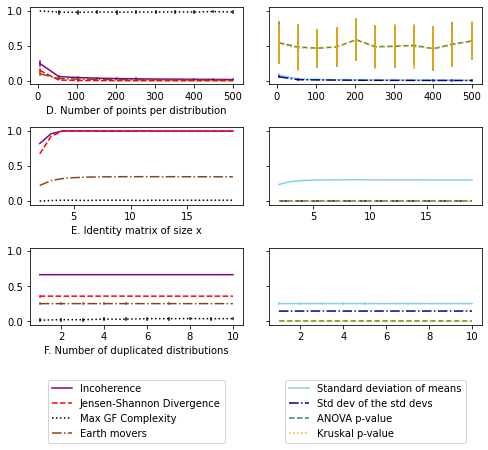

In [140]:
FLATS = [
    ('increasing_points', "D. Number of points per distribution"),
    ('identity_matrix', "E. Identity matrix of size x"),
    ('increasing_ensembles', "F. Number of duplicated distributions"),
]
plot(FLATS, FLATS_DATA).savefig('cont-flat.eps', bbox_inches='tight')

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


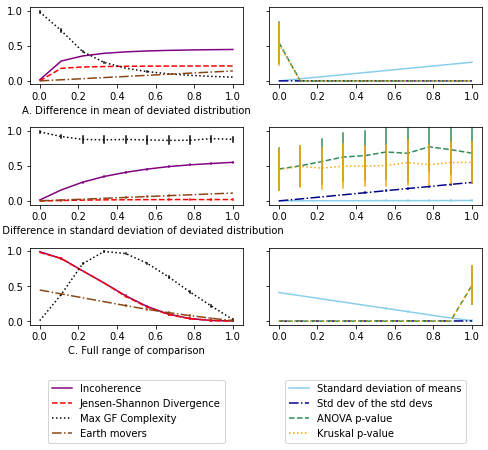

In [141]:
PROGS = [
    ('increasing_means', "A. Difference in mean of deviated distribution"),
    ('increasing_std', "B. Difference in standard deviation of deviated distribution"),
    ('full_range', "C. Full range of comparison"),
]
plot(PROGS, PROGS_DATA).savefig('cont-progs.eps', bbox_inches='tight')